# **LAB-6**

**AIM** : Implementation of text classification system by applying ML algorithms with different encoding techniques


1.   ML Algorithms: Naïve Bayes,KNN,SVM and Random Forest
2.   Encoding Techniques:BOW,Bag of n grams,TF-IDF,Word embeddings using GENSIM,SPACY and custom based embedding(CBOW and Skip-Gram)



## **CODE**:

## **Text** **Preprocessing**

Text preprocessing involves the cleaning, normalization and standardization of text before the application of NLP techniques. Keep in mind that although there are several types of text preprocessing techniques, one must use the ones suitable for their use case in an order that makes sense.

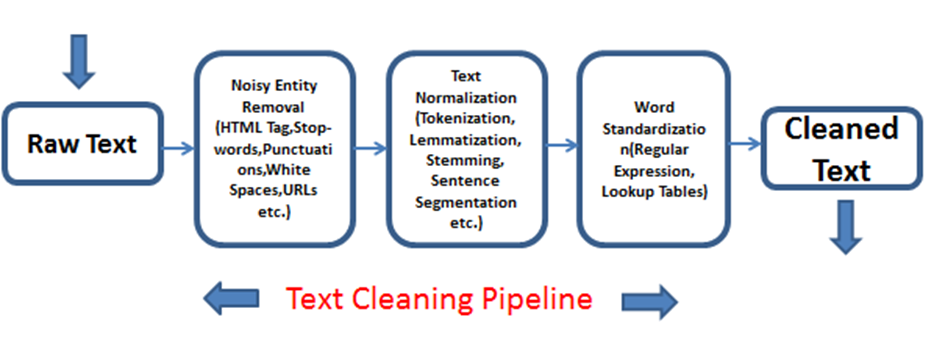

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('reviews.csv')
data

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
0,gp:AOqpTOEhZuqSqqWnaKRgv-9ABYdajFUB0WugPGh-SG-...,Eric Tie,https://play-lh.googleusercontent.com/a-/AOh14...,I cannot open the app anymore,1,0,5.4.0.6,2020-10-27 21:24:41,NaN,NaN,newest,com.anydo
1,gp:AOqpTOH0WP4IQKBZ2LrdNmFy_YmpPCVrV3diEU9KGm3...,john alpha,https://play-lh.googleusercontent.com/a-/AOh14...,I have been begging for a refund from this app...,1,0,NaN,2020-10-27 14:03:28,"Please note that from checking our records, yo...",2020-10-27 15:05:52,newest,com.anydo
2,gp:AOqpTOEMCkJB8Iq1p-r9dPwnSYadA5BkPWTf32Z1azu...,Sudhakar .S,https://play-lh.googleusercontent.com/a-/AOh14...,Very costly for the premium version (approx In...,1,0,NaN,2020-10-27 08:18:40,NaN,NaN,newest,com.anydo
3,gp:AOqpTOGFrUWuKGycpje8kszj3uwHN6tU_fd4gLVFy9z...,SKGflorida@bellsouth.net DAVID S,https://play-lh.googleusercontent.com/-75aK0WF...,"Used to keep me organized, but all the 2020 UP...",1,0,NaN,2020-10-26 13:28:07,What do you find troublesome about the update?...,2020-10-26 14:58:29,newest,com.anydo
4,gp:AOqpTOHls7DW8wmDFzTkHwxuqFkdNQtKHmO6Pt9jhZE...,Louann Stoker,https://play-lh.googleusercontent.com/-pBcY_Z-...,Dan Birthday Oct 28,1,0,5.6.0.7,2020-10-26 06:10:50,NaN,NaN,newest,com.anydo
...,...,...,...,...,...,...,...,...,...,...,...,...
12490,gp:AOqpTOEQPqib7pb6vFyjMY9JEfsMs_u8WCdqg6mbcar...,Mildred Olima,https://play-lh.googleusercontent.com/a-/AOh14...,"I really like the planner, it helps me achieve...",5,0,4.5.4,2018-12-21 00:13:09,NaN,NaN,newest,com.appxy.planner
12491,gp:AOqpTOE1KKOOVVKUfhAfXQs2NfJpoywfucrJCMK3Hmu...,Roaring Grizzly Bear,https://play-lh.googleusercontent.com/a-/AOh14...,😁****😁,5,0,NaN,2018-12-12 21:52:56,NaN,NaN,newest,com.appxy.planner
12492,gp:AOqpTOFEn5UgYYggqiHKauDJVLLN8-16nk1AfZbEhkj...,amirbadang,https://play-lh.googleusercontent.com/-CM2FcrU...,Very useful apps. You must try it,5,0,4.5.4,2018-12-11 15:49:43,NaN,NaN,newest,com.appxy.planner
12493,gp:AOqpTOHOH6YdYLR91qZdYpeIVkMI-LeAE0EwYgrctid...,Emma Stebbins,https://play-lh.googleusercontent.com/-oCj6g6k...,Would pay for this if there were even more add...,5,0,4.5.4,2018-12-06 04:59:26,NaN,NaN,newest,com.appxy.planner


In [3]:
import pandas as pd
import numpy as np
import ast
import re
import os
import nltk
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.svm import SVC
from sklearn import metrics
import matplotlib.pyplot as plt
import warnings

from sklearn.model_selection import RandomizedSearchCV,train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn import metrics
from sklearn.svm import SVC 
from sklearn import tree

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

warnings.filterwarnings(action='ignore')
import seaborn as sn
%matplotlib inline

In [4]:
df=pd.DataFrame(data)

In [5]:
df.shape

(12495, 12)

In [6]:
df.info

<bound method DataFrame.info of                                                 reviewId  \
0      gp:AOqpTOEhZuqSqqWnaKRgv-9ABYdajFUB0WugPGh-SG-...   
1      gp:AOqpTOH0WP4IQKBZ2LrdNmFy_YmpPCVrV3diEU9KGm3...   
2      gp:AOqpTOEMCkJB8Iq1p-r9dPwnSYadA5BkPWTf32Z1azu...   
3      gp:AOqpTOGFrUWuKGycpje8kszj3uwHN6tU_fd4gLVFy9z...   
4      gp:AOqpTOHls7DW8wmDFzTkHwxuqFkdNQtKHmO6Pt9jhZE...   
...                                                  ...   
12490  gp:AOqpTOEQPqib7pb6vFyjMY9JEfsMs_u8WCdqg6mbcar...   
12491  gp:AOqpTOE1KKOOVVKUfhAfXQs2NfJpoywfucrJCMK3Hmu...   
12492  gp:AOqpTOFEn5UgYYggqiHKauDJVLLN8-16nk1AfZbEhkj...   
12493  gp:AOqpTOHOH6YdYLR91qZdYpeIVkMI-LeAE0EwYgrctid...   
12494  gp:AOqpTOFuJtS1McUdEZuLCnRn7k-UUcGNml7XqxKTSk2...   

                               userName  \
0                              Eric Tie   
1                            john alpha   
2                           Sudhakar .S   
3      SKGflorida@bellsouth.net DAVID S   
4                         Louann

In [7]:
df.value_counts

<bound method DataFrame.value_counts of                                                 reviewId  \
0      gp:AOqpTOEhZuqSqqWnaKRgv-9ABYdajFUB0WugPGh-SG-...   
1      gp:AOqpTOH0WP4IQKBZ2LrdNmFy_YmpPCVrV3diEU9KGm3...   
2      gp:AOqpTOEMCkJB8Iq1p-r9dPwnSYadA5BkPWTf32Z1azu...   
3      gp:AOqpTOGFrUWuKGycpje8kszj3uwHN6tU_fd4gLVFy9z...   
4      gp:AOqpTOHls7DW8wmDFzTkHwxuqFkdNQtKHmO6Pt9jhZE...   
...                                                  ...   
12490  gp:AOqpTOEQPqib7pb6vFyjMY9JEfsMs_u8WCdqg6mbcar...   
12491  gp:AOqpTOE1KKOOVVKUfhAfXQs2NfJpoywfucrJCMK3Hmu...   
12492  gp:AOqpTOFEn5UgYYggqiHKauDJVLLN8-16nk1AfZbEhkj...   
12493  gp:AOqpTOHOH6YdYLR91qZdYpeIVkMI-LeAE0EwYgrctid...   
12494  gp:AOqpTOFuJtS1McUdEZuLCnRn7k-UUcGNml7XqxKTSk2...   

                               userName  \
0                              Eric Tie   
1                            john alpha   
2                           Sudhakar .S   
3      SKGflorida@bellsouth.net DAVID S   
4                       

In [8]:
df.describe

<bound method NDFrame.describe of                                                 reviewId  \
0      gp:AOqpTOEhZuqSqqWnaKRgv-9ABYdajFUB0WugPGh-SG-...   
1      gp:AOqpTOH0WP4IQKBZ2LrdNmFy_YmpPCVrV3diEU9KGm3...   
2      gp:AOqpTOEMCkJB8Iq1p-r9dPwnSYadA5BkPWTf32Z1azu...   
3      gp:AOqpTOGFrUWuKGycpje8kszj3uwHN6tU_fd4gLVFy9z...   
4      gp:AOqpTOHls7DW8wmDFzTkHwxuqFkdNQtKHmO6Pt9jhZE...   
...                                                  ...   
12490  gp:AOqpTOEQPqib7pb6vFyjMY9JEfsMs_u8WCdqg6mbcar...   
12491  gp:AOqpTOE1KKOOVVKUfhAfXQs2NfJpoywfucrJCMK3Hmu...   
12492  gp:AOqpTOFEn5UgYYggqiHKauDJVLLN8-16nk1AfZbEhkj...   
12493  gp:AOqpTOHOH6YdYLR91qZdYpeIVkMI-LeAE0EwYgrctid...   
12494  gp:AOqpTOFuJtS1McUdEZuLCnRn7k-UUcGNml7XqxKTSk2...   

                               userName  \
0                              Eric Tie   
1                            john alpha   
2                           Sudhakar .S   
3      SKGflorida@bellsouth.net DAVID S   
4                         Loua

In [9]:

df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
0,gp:AOqpTOEhZuqSqqWnaKRgv-9ABYdajFUB0WugPGh-SG-...,Eric Tie,https://play-lh.googleusercontent.com/a-/AOh14...,I cannot open the app anymore,1,0,5.4.0.6,2020-10-27 21:24:41,NaN,NaN,newest,com.anydo
1,gp:AOqpTOH0WP4IQKBZ2LrdNmFy_YmpPCVrV3diEU9KGm3...,john alpha,https://play-lh.googleusercontent.com/a-/AOh14...,I have been begging for a refund from this app...,1,0,NaN,2020-10-27 14:03:28,"Please note that from checking our records, yo...",2020-10-27 15:05:52,newest,com.anydo
2,gp:AOqpTOEMCkJB8Iq1p-r9dPwnSYadA5BkPWTf32Z1azu...,Sudhakar .S,https://play-lh.googleusercontent.com/a-/AOh14...,Very costly for the premium version (approx In...,1,0,NaN,2020-10-27 08:18:40,NaN,NaN,newest,com.anydo
3,gp:AOqpTOGFrUWuKGycpje8kszj3uwHN6tU_fd4gLVFy9z...,SKGflorida@bellsouth.net DAVID S,https://play-lh.googleusercontent.com/-75aK0WF...,"Used to keep me organized, but all the 2020 UP...",1,0,NaN,2020-10-26 13:28:07,What do you find troublesome about the update?...,2020-10-26 14:58:29,newest,com.anydo
4,gp:AOqpTOHls7DW8wmDFzTkHwxuqFkdNQtKHmO6Pt9jhZE...,Louann Stoker,https://play-lh.googleusercontent.com/-pBcY_Z-...,Dan Birthday Oct 28,1,0,5.6.0.7,2020-10-26 06:10:50,NaN,NaN,newest,com.anydo


In [10]:
df['score'].value_counts()

5    2879
4    2775
1    2506
2    2344
3    1991
Name: score, dtype: int64

In [11]:
df.isnull().sum()

reviewId                   0
userName                   0
userImage                  0
content                    0
score                      0
thumbsUpCount              0
reviewCreatedVersion    2162
at                         0
replyContent            6677
repliedAt               6677
sortOrder                  0
appId                      0
dtype: int64

In [12]:
use_df = df[['reviewId', 'userName','content', 'score']]
use_df.head()

,reviewId,userName,content,score
0,gp:AOqpTOEhZuqSqqWnaKRgv-9ABYdajFUB0WugPGh-SG-...,Eric Tie,I cannot open the app anymore,1
1,gp:AOqpTOH0WP4IQKBZ2LrdNmFy_YmpPCVrV3diEU9KGm3...,john alpha,I have been begging for a refund from this app...,1
2,gp:AOqpTOEMCkJB8Iq1p-r9dPwnSYadA5BkPWTf32Z1azu...,Sudhakar .S,Very costly for the premium version (approx In...,1
3,gp:AOqpTOGFrUWuKGycpje8kszj3uwHN6tU_fd4gLVFy9z...,SKGflorida@bellsouth.net DAVID S,"Used to keep me organized, but all the 2020 UP...",1
4,gp:AOqpTOHls7DW8wmDFzTkHwxuqFkdNQtKHmO6Pt9jhZE...,Louann Stoker,Dan Birthday Oct 28,1


In [13]:
!pip install emot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.5/61.5 kB 4.2 MB/s eta 0:00:00


## **Text Cleaning**



*  Will first remove emojis (if any) present in the documents.

*   Will remove all special and not necessary characters from the documents.



In [14]:
import re
import pickle
from emot.emo_unicode import UNICODE_EMOJI # For emojis
from emot.emo_unicode import EMOTICONS_EMO # For EMOTICONS
import random
from bs4 import BeautifulSoup

In [15]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F" # emoticons
                           u"\U0001F300-\U0001F5FF" # symbols & pictographs
                           u"\U0001F680-\U0001F6FF" # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF" # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

In [16]:
use_df['content'] = use_df['content'].apply(lambda x:remove_emoji(x))

In [17]:
use_df['content'].head(2)

0                        I cannot open the app anymore
1    I have been begging for a refund from this app...
Name: content, dtype: object

 **Explanation for using some symbols in above regex expression**


*   \1 —> is equivalent to re.search(...). group(1). It Refers to first capturing 
*   group. \1 matches the exact same text that was matched by the first capturing group.

*   {1,} --> It means we are matching for repeatation that occurs more than one times.
*   DOTALL -> It matches newline character as well unlike dot operator which matches everything in the given text except newline character.
*   sub() --> This function is used to replace occurrences of a particular sub-string with another sub-string. This function takes as input the following: The sub-string to replace. The sub-string to replace with.
*   r'\1\1' --> It limits all the repeatation to two characters.
*  r'\1' --> Limits all the repeatation to only one character.
*   {2,} --> It means to match for repeatation that occurs more than two times













In [18]:
def cleantext(text):
    
    return re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", text)
    
use_df['content'] = use_df['content'].apply(lambda x:cleantext(x))
use_df.isnull().sum()

reviewId    0
userName    0
content     0
score       0
dtype: int64

In [19]:
df_clean = use_df[(use_df['content']!=' ')&(use_df['content']!='')]
df_clean.shape,use_df.shape

((12446, 4), (12495, 4))

## **Word Level** **Analysis**

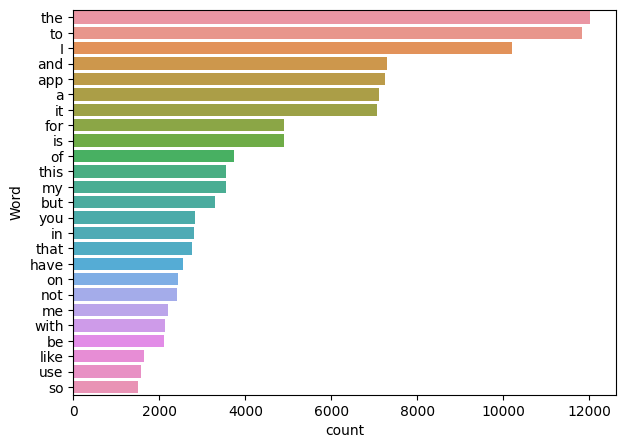

In [20]:
def showmostfrequentwords(text,no_of_words):
    
    allwords = ' '.join([char for char in text])
    allwords = allwords.split()
    fdist = nltk.FreqDist(allwords)
    
    wordsdf = pd.DataFrame({'word':list(fdist.keys()),'count':list(fdist.values())})
    
    df = wordsdf.nlargest(columns="count",n = no_of_words)
    
    plt.figure(figsize=(7,5))
    ax = sn.barplot(data=df,x = 'count',y = 'word')
    ax.set(ylabel = 'Word')
    plt.show()
    
    return wordsdf
    
wordsdf = showmostfrequentwords(df_clean['content'],25)

In [21]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

## **Removal of Stopwords**

In [22]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# removing the stopwords

def removestopwords(text):
    
    removedstopword = [word for word in text.split() if word not in stop_words]
    return ' '.join(removedstopword)

df_clean['content'] = df_clean['content'].apply(lambda x:removestopwords(x))
df_clean['content'].iloc[1] #I have been begging for a refund from this app..

'I begging refund app month nobody replying'

In [23]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

## **Lemmatizing the Text**

In [24]:
from nltk.stem import WordNetLemmatizer

lemma=WordNetLemmatizer()

def lematizing(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = lemma.lemmatize(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence


df_clean['content'] = df_clean['content'].apply(lambda x: lematizing(x))
df_clean['content'].iloc[1]

'I begging refund app month nobody replying'

## **Stemming the Text**

In [25]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

def stemming(sentence):
    
    stemmed_sentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemmed_sentence+=stem
        stemmed_sentence+=" "
        
    stemmed_sentence = stemmed_sentence.strip()
    return stemmed_sentence

df_clean['content'] = df_clean['content'].apply(lambda text:stemming(text))
df_clean['content'].iloc[1]

'i beg refund app month nobodi repli'

In [26]:
use_df.head()

,reviewId,userName,content,score
0,gp:AOqpTOEhZuqSqqWnaKRgv-9ABYdajFUB0WugPGh-SG-...,Eric Tie,I cannot open the app anymore,1
1,gp:AOqpTOH0WP4IQKBZ2LrdNmFy_YmpPCVrV3diEU9KGm3...,john alpha,I have been begging for a refund from this app...,1
2,gp:AOqpTOEMCkJB8Iq1p-r9dPwnSYadA5BkPWTf32Z1azu...,Sudhakar .S,Very costly for the premium version approx Ind...,1
3,gp:AOqpTOGFrUWuKGycpje8kszj3uwHN6tU_fd4gLVFy9z...,SKGflorida@bellsouth.net DAVID S,Used to keep me organized but all the 2020 UPD...,1
4,gp:AOqpTOHls7DW8wmDFzTkHwxuqFkdNQtKHmO6Pt9jhZE...,Louann Stoker,Dan Birthday Oct 28,1


## **One Hot Encoding**

In [27]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit_transform(use_df[['content']]).toarray()
new_df=use_df

In [28]:
new_df['content'].head(2)

0                        I cannot open the app anymore
1    I have been begging for a refund from this app...
Name: content, dtype: object

In [29]:
enc_df = pd.DataFrame(enc.fit_transform(use_df[['content']]).toarray())

In [30]:
enc_df

,0,1,2,3,4,5,6,7,8,9,...,11620,11621,11622,11623,11624,11625,11626,11627,11628,11629
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12490,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12491,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12492,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12493,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
use_df=use_df.join(enc_df)

In [32]:
use_df.head(2)

,reviewId,userName,content,score,0,1,2,3,4,5,...,11620,11621,11622,11623,11624,11625,11626,11627,11628,11629
0,gp:AOqpTOEhZuqSqqWnaKRgv-9ABYdajFUB0WugPGh-SG-...,Eric Tie,I cannot open the app anymore,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,gp:AOqpTOH0WP4IQKBZ2LrdNmFy_YmpPCVrV3diEU9KGm3...,john alpha,I have been begging for a refund from this app...,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
X=use_df.iloc[:,4:]

In [34]:
X

,0,1,2,3,4,5,6,7,8,9,...,11620,11621,11622,11623,11624,11625,11626,11627,11628,11629
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12490,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12491,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12492,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12493,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
y=use_df['score']

In [36]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [37]:
X_train.shape

(9996, 11630)

In [38]:
X_test.shape

(2499, 11630)

## **Building Model**

## **Naive Bayes**

In [39]:
mb = MultinomialNB()
mb.fit(X_train,y_train)

MultinomialNB()

In [40]:
mbpred = mb.predict(X_test)
print(metrics.accuracy_score(y_test,mbpred))

0.22969187675070027


In [41]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)
print(metrics.accuracy_score(y_test,rf_pred))

0.23329331732693076


In [42]:
temp=new_df
temp1=temp

## **KNN**

In [43]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
print(metrics.accuracy_score(y_test,y_pred))

0.20448179271708683


## **SVM**

In [ ]:
from sklearn import svm, datasets
svc = svm.SVC(kernel ='linear', C = 1).fit(X_train, y_train)

In [ ]:
sv_pred=svc.predict(X_test)

## **Using Count-Vectorizer**

In [44]:
data = df_clean[['reviewId', 'content', 'score']]

count_vec = CountVectorizer(max_df=0.90,min_df=2,
                           max_features=1000,stop_words='english')

bagofword_vec = count_vec.fit_transform(data['content'])
bagofword_vec

<12446x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 123937 stored elements in Compressed Sparse Row format>

In [45]:
test = df_clean['score']
X_train, X_test, y_train, y_test = train_test_split(bagofword_vec,test,
                                                    test_size=0.2)
X_train.shape,X_test.shape

((9956, 1000), (2490, 1000))

In [46]:
mb = MultinomialNB()
mb.fit(X_train,y_train)
mbpred = mb.predict(X_test)
print(metrics.accuracy_score(y_test,mbpred))

0.457429718875502


In [47]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)
print(metrics.accuracy_score(y_test,rf_pred))

0.43734939759036146


In [49]:
from sklearn import svm, datasets
svc = svm.SVC(kernel ='linear', C = 1).fit(X_train, y_train)
sv_pred=svc.predict(X_test)
print(metrics.accuracy_score(y_test,sv_pred))

0.43453815261044176


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 2)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

0.31606425702811247


# **BAG OF N-GRAMS**

In [50]:
v = CountVectorizer(ngram_range=(1,2))
v.fit(data['content'])
v.vocabulary_

{'cannot': 16038,
 'open': 65523,
 'app': 7365,
 'anymor': 6931,
 'cannot open': 16096,
 'open app': 65533,
 'app anymor': 7448,
 'beg': 12127,
 'refund': 76261,
 'month': 59606,
 'nobodi': 62648,
 'repli': 77601,
 'beg refund': 12134,
 'refund app': 76263,
 'app month': 8115,
 'month nobodi': 59721,
 'nobodi repli': 62651,
 'veri': 102254,
 'costli': 21170,
 'premium': 71617,
 'version': 102411,
 'approx': 9246,
 'indian': 46991,
 'rupe': 79523,
 '910': 1434,
 'per': 68590,
 'year': 108952,
 'better': 12586,
 'download': 27751,
 'apkmo': 7315,
 'websit': 104621,
 'use': 100796,
 'microsoft': 58347,
 'list': 53585,
 'far': 33518,
 'veri costli': 102275,
 'costli premium': 21172,
 'premium version': 71834,
 'version approx': 102449,
 'approx indian': 9248,
 'indian rupe': 46992,
 'rupe 910': 79524,
 '910 per': 1435,
 'per year': 68617,
 'year better': 108977,
 'better download': 12640,
 'download premium': 27826,
 'version app': 102446,
 'app apkmo': 7453,
 'apkmo websit': 7316,
 'websi

In [ ]:
mb_n = MultinomialNB()
mb_n.fit(X_train,y_train)
mbpred_n = mb_n.predict(X_test)
print(metrics.accuracy_score(y_test,mbpred_n))

0.45582329317269077


In [52]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)
print(metrics.accuracy_score(y_test,rf_pred))

0.42650602409638555


In [51]:
from sklearn import svm, datasets
svc = svm.SVC(kernel ='linear', C = 1).fit(X_train, y_train)
sv_pred=svc.predict(X_test)
print(metrics.accuracy_score(y_test,sv_pred))

0.43453815261044176


## **Using TF-DIF**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data = df_clean[['reviewId', 'content', 'score']]

y=data['score']

X_train,X_test,y_train,y_test = train_test_split(df_clean['content']
                                                ,y,test_size=0.2,
                                                random_state=557)

X_train.shape,X_test.shape

((9956,), (2490,))

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000)
xtrain_tfidf = tfidf_vectorizer.fit_transform(X_train.values.astype('U'))
xtest_tfidf = tfidf_vectorizer.transform(X_test.values.astype('U'))

In [ ]:
mb1 = MultinomialNB()
mb1.fit(xtrain_tfidf,y_train)
mbpred1 = mb1.predict(xtest_tfidf)
print(metrics.accuracy_score(y_test,mbpred1))

0.4791164658634538


In [ ]:
rf1 = RandomForestClassifier()
rf1.fit(xtrain_tfidf,y_train)
rf_pred1 = rf1.predict(xtest_tfidf)
print(metrics.accuracy_score(y_test,rf_pred1))

0.45903614457831327


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 2)
classifier.fit(xtrain_tfidf, y_train)
y_pred = classifier.predict(xtest_tfidf)
print(metrics.accuracy_score(y_test,y_pred))

0.28313253012048195


In [ ]:
from sklearn import svm, datasets
svc = svm.SVC(kernel ='linear', C = 1).fit(xtrain_tfidf, y_train)
sv_pred=svc.predict(xtest_tfidf)
print(metrics.accuracy_score(y_test,sv_pred))

0.4642570281124498


In [ ]:
dtree = DecisionTreeClassifier()
dtree.fit(xtrain_tfidf,y_train)
dtree_pred = dtree.predict(xtest_tfidf)
metrics.accuracy_score(y_test,dtree_pred)

0.36987951807228914

**CONCLUSION**

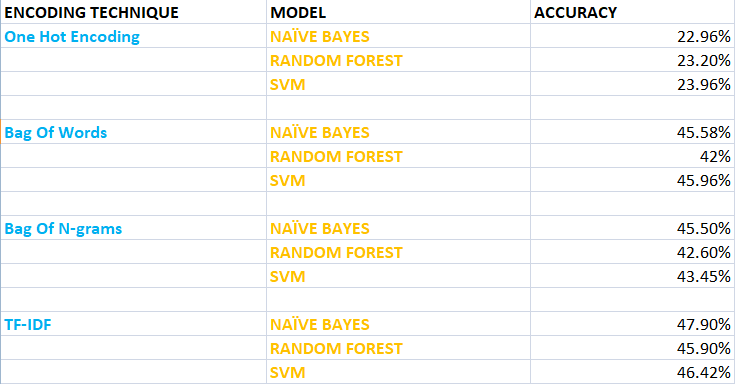